In [2]:
! git clone https://github.com/anuragvij264/MUSE.git
! mv  MUSE/* ./

Cloning into 'MUSE'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 247 (delta 0), reused 2 (delta 0), pack-reused 241
Receiving objects: 100% (247/247), 562.95 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [3]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 3653 (delta 53), reused 67 (delta 27), pack-reused 3531
Receiving objects: 100% (3653/3653), 8.16 MiB | 29.74 MiB/s, done.
Resolving deltas: 100% (2277/2277), done.


In [4]:
! cd fastText && pip install .

Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2861872 sha256=b09e9175074006b9c5f472cb12d8cd4e37f3152d5d26bc59b51a129aef24965e
  Stored in directory: /tmp/pip-ephem-wheel-cache-oe1t4gcg/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [5]:
! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.bin.gz
! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

--2020-01-22 04:25:18--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4371554972 (4.1G) [application/octet-stream]
Saving to: ‘cc.hi.300.bin.gz’

cc.hi.300.bin.gz    100%[===================>]   4.07G  46.5MB/s    in 96s     

2020-01-22 04:26:55 (43.5 MB/s) - ‘cc.hi.300.bin.gz’ saved [4371554972/4371554972]

--2020-01-22 04:26:57--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/oc

In [6]:
!pip install faiss-gpu

     |████████████████████████████████| 41.0MB 47kB/s 


In [0]:
!gunzip cc.en.300.bin.gz
!gunzip cc.hi.300.bin.gz

In [0]:
!mv cc.en.300.bin data/cc.en.300.bin
!mv cc.hi.300.bin data/cc.hi.300.bin

In [0]:
!mkdir data/crosslingual
!mkdir data/crosslingual/dictionaries

In [10]:
! wget  https://dl.fbaipublicfiles.com/arrival/dictionaries/en-hi.txt
! wget  https://dl.fbaipublicfiles.com/arrival/dictionaries/en-hi.0-5000.txt
! wget  https://dl.fbaipublicfiles.com/arrival/dictionaries/hi-en.0-5000.txt

--2020-01-22 04:34:43--  https://dl.fbaipublicfiles.com/arrival/dictionaries/en-hi.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930856 (909K) [text/x-c++]
Saving to: ‘en-hi.txt.1’

en-hi.txt.1         100%[===================>] 909.04K   864KB/s    in 1.1s    

2020-01-22 04:34:45 (864 KB/s) - ‘en-hi.txt.1’ saved [930856/930856]

--2020-01-22 04:34:46--  https://dl.fbaipublicfiles.com/arrival/dictionaries/en-hi.0-5000.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219327 (214K) [text/x-c++]
Saving to: ‘en-hi.0-5000.txt’

en-hi.0-5000.txt    1

In [0]:
! mv en-hi.txt data/crosslingual/dictionaries/en-hi.txt
! mv en-hi.0-5000.txt data/crosslingual/dictionaries/en-hi.0-5000.txt
! mv hi-en.0-5000.txt data/crosslingual/dictionaries/hi-en.0-5000.txt

In [12]:
! python supervised.py --src_lang hi --tgt_lang en --src_emb /content/data/cc.hi.300.bin --tgt_emb /content/data/cc.en.300.bin  --dico_train default

INFO - 01/22/20 04:35:49 - 0:00:00 - ============ Initialized logger ============
INFO - 01/22/20 04:35:49 - 0:00:00 - cuda: True
                                     dico_build: S2T&T2S
                                     dico_eval: default
                                     dico_max_rank: 10000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dico_train: default
                                     emb_dim: 300
                                     exp_id: 
                                     exp_name: debug
                                     exp_path: /content/dumped/debug/co4q30tuhy
                                     export: txt
                                     max_vocab: 200000
                                     n_refinement: 5
                               

In [0]:
import io
import numpy as np

In [0]:

def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
      next(f)
      for i, line in enumerate(f):
        word, vect = line.rstrip().split(' ', 1)
        vect = np.fromstring(vect, sep=' ')
        assert word not in word2id, 'word found twice'
        vectors.append(vect)
        word2id[word] = len(word2id)
        if len(word2id) == nmax:
            break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [0]:
src_path = '/content/dumped/debug/co4q30tuhy/vectors-en.txt'
tgt_path = '/content/dumped/debug/co4q30tuhy/vectors-hi.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [0]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
  print("Nearest neighbors of \"%s\":" % word)
  word2id = {v: k for k, v in src_id2word.items()}
  word_emb = src_emb[word2id[word]]
  scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
  k_best = scores.argsort()[-K:][::-1]
  for i, idx in enumerate(k_best):
    print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [17]:
# printing nearest neighbors in the source space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "cat":
1.0000 - cat
0.8350 - cats
0.8233 - kitty
0.8083 - kitten
0.7534 - feline


In [25]:
src_word = "पालतू"
get_nn(src_word, tgt_embeddings, tgt_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "पालतू":
0.6495 - pet
0.5983 - dog
0.5621 - pets
0.5476 - cat
0.5440 - dogs


In [20]:
# printing nearest neighbors in the target space
src_word = 'dog'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "dog":
0.6683 - कुत्ते
0.5983 - पालतू
0.5860 - कुत्तों
0.5648 - कुत्ता
0.4816 - जानवर


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.10


In [0]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
      Y.append(src_emb[src_word2id[sw]])
      word_labels.append(sw)
    for tw in tgt_words:
      Y.append(tgt_emb[tgt_word2id[tw]])
      word_labels.append(tw)

      # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                              color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 

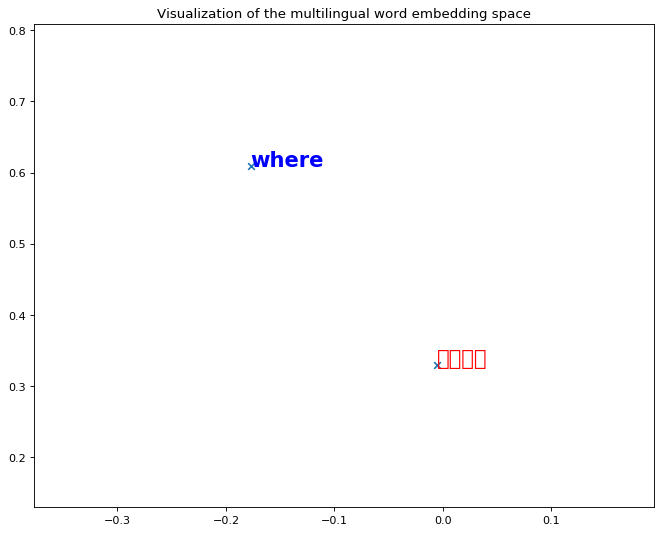

In [29]:


# get 5 random input words
tgt_words = ['कहाँ'] 
src_words = ['where']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)



In [0]:
from collections import OrderedDict
import sys
d2r_dict=OrderedDict([
('क्','k'), 
('ख्','kh'), 
('ग्','g'), 
('घ्','gh'), 
('ङ्','n'), 
('च्','ch'), 
('छ्','chh'), 
('ज्','j'), 
('झ्','jh'), 
('ञ्','n'), 
('ट्','t'), 
('ठ्','th'), 
('ड्','d'), 
('ढ्','dh'), 
('ण्','n'), 
('त्','t'), 
('थ्','th'), 
('द्','d'), 
('ध्','dh'), 
('न्','n'), 
('प्','p'), 
('फ्','ph'), 
('ब्','b'), 
('भ्','bh'), 
('म्','m'), 
('य्','y'), 
('र्','r'), 
('ल्','l'), 
('व्','w'), 
('श्','s'), 
('ष्','s'), 
('स्','s'), 
('ह्','h'), 
('ष','श'), 
('स','श'), 
('का','kaa'), 
('को','ko'),
('कौ','kau'),
('कि','ki'),
('की','ki'),
('कु','ku'),
('कू','ku'),
('के','ke'),
('कै','kai'),
('कं','kum'),
('खा','khaa'), 
('खो','kho'),
('खौ','khau'),
('खि','khi'),
('खी','khi'),
('खु','khu'),
('खू','khu'),
('खे','khe'),
('खै','khai'),
('खं','khum'),
('गा','gaa'), 
('गो','go'),
('गौ','gau'),
('गि','gi'),
('गी','gi'),
('गु','gu'),
('गू','gu'),
('गे','ge'),
('गै','gai'),
('गं','gum'),
('घा','ghaa'), 
('घो','gho'),
('घौ','ghau'),
('घि','ghi'),
('घी','ghi'),
('घु','ghu'),
('घू','ghu'),
('घे','ghe'),
('घै','ghai'),
('घं','ghum'),
('ङा','naa'), 
('ङो','no'),
('ङौ','nau'),
('ङि','ni'),
('ङी','ni'),
('ङु','nu'),
('ङू','nu'),
('ङे','ne'),
('ङै','nai'),
('ङं','num'),
('चा','chaa'), 
('चो','cho'),
('चौ','chau'),
('चि','chi'),
('ची','chi'),
('चु','chu'),
('चू','chu'),
('चे','che'),
('चै','chai'),
('चं','chum'),
('छा','chhaa'), 
('छो','chho'),
('छौ','chhau'),
('छि','chhi'),
('छी','chhi'),
('छु','chhu'),
('छू','chhu'),
('छे','chhe'),
('छै','chhai'),
('छं','chhum'),
('जा','jaa'), 
('जो','jo'),
('जौ','jau'),
('जि','ji'),
('जी','ji'),
('जु','ju'),
('जू','ju'),
('जे','je'),
('जै','jai'),
('जं','jum'),
('झा','jhaa'), 
('झो','jho'),
('झौ','jhau'),
('झि','jhi'),
('झी','jhi'),
('झु','jhu'),
('झू','jhu'),
('झे','jhe'),
('झै','jhai'),
('झं','jhum'),
('ञा','naa'), 
('ञो','no'),
('ञौ','nau'),
('ञि','ni'),
('ञी','ni'),
('ञु','nu'),
('ञू','nu'),
('ञे','ne'),
('ञै','nai'),
('ञं','num'),
('टा','taa'), 
('टो','to'),
('टौ','tau'),
('टि','ti'),
('टी','ti'),
('टु','tu'),
('टू','tu'),
('टे','te'),
('टै','tai'),
('टं','tum'),
('ठा','thaa'), 
('ठो','tho'),
('ठौ','thau'),
('ठि','thi'),
('ठी','thi'),
('ठु','thu'),
('ठू','thu'),
('ठे','the'),
('ठै','thai'),
('ठं','thum'),
('डा','daa'), 
('डो','do'),
('डौ','dau'),
('डि','di'),
('डी','di'),
('डु','du'),
('डू','du'),
('डे','de'),
('डै','dai'),
('डं','dum'),
('ढा','dhaa'), 
('ढो','dho'),
('ढौ','dha'),
('ढि','dhi'),
('ढी','dhi'),
('ढु','dhu'),
('ढू','dhu'),
('ढे','dhe'),
('ढै','dhai'),
('ढं','dhum'),
('ता','taa'), 
('तो','to'),
('तौ','tau'),
('ति','ti'),
('ती','ti'),
('तु','tu'),
('तू','tu'),
('ते','te'),
('तै','tai'),
('तं','tum'),
('था','thaa'), 
('थो','tho'),
('थौ','thau'),
('थि','thi'),
('थी','thi'),
('थु','thu'),
('थू','thu'),
('थे','the'),
('थै','thai'),
('थं','thum'),
('दा','daa'), 
('दो','do'),
('दौ','dau'),
('दि','di'),
('दी','di'),
('दु','du'),
('दू','du'),
('दे','de'),
('दै','dai'),
('दं','dum'),
('धा','dhaa'), 
('धो','dho'),
('धौ','dhau'),
('धि','dhi'),
('धी','dhi'),
('धु','dhu'),
('धू','dhu'),
('धे','dhe'),
('धै','dhai'),
('धं','dhum'),
('ना','naa'), 
('नो','no'),
('नौ','nau'),
('नि','ni'),
('नी','ni'),
('नु','nu'),
('नू','nu'),
('ने','ne'),
('नै','nai'),
('नं','num'),
('पा','paa'), 
('पो','po'),
('पौ','pau'),
('पि','pi'),
('पी','pi'),
('पु','pu'),
('पू','pu'),
('पे','pe'),
('पै','pai'),
('पं','pum'),
('फा','phaa'), 
('फो','pho'),
('फौ','phau'),
('फि','phi'),
('फी','phi'),
('फु','phu'),
('फू','phu'),
('फे','phe'),
('फै','phai'),
('फं','phum'),
('बा','baa'), 
('बो','bo'),
('बौ','bau'),
('बि','bi'),
('बी','bi'),
('बु','bu'),
('बू','bu'),
('बे','be'),
('बै','bai'),
('बं','bum'),
('भा','bhaa'), 
('भो','bho'),
('भौ','bhau'),
('भि','bhi'),
('भी','bhi'),
('भु','bhu'),
('भू','bhu'),
('भे','bhe'),
('भै','bhai'),
('भं','bhum'),
('मा','maa'), 
('मो','mo'),
('मौ','mau'),
('मि','mi'),
('मी','mi'),
('मु','mu'),
('मू','mu'),
('मे','me'),
('मै','mai'),
('मं','mum'),
('या','yaa'), 
('यो','yo'),
('यौ','yau'),
('यि','yi'),
('यी','yi'),
('यु','yu'),
('यू','yu'),
('ये','ye'),
('यै','yai'),
('यं','yum'),
('रा','raa'), 
('रो','ro'),
('रौ','rau'),
('रि','ri'),
('री','ri'),
('रु','ru'),
('रू','ru'),
('रे','re'),
('रै','rai'),
('रं','rum'),
('ला','laa'), 
('लो','lo'),
('लौ','lau'),
('लि','li'),
('ली','li'),
('लु','lu'),
('लू','lu'),
('ले','le'),
('लै','lai'),
('लं','lum'),
('वा','waa'), 
('वो','wo'),
('वौ','wau'),
('वि','wi'),
('वी','wi'),
('वु','wu'),
('वू','wu'),
('वे','we'),
('वै','wai'),
('वं','wum'),
('शा','saa'), 
('शो','so'),
('शौ','sau'),
('शि','si'),
('शी','si'),
('शु','su'),
('शू','su'),
('शे','se'),
('शै','sai'),
('शं','sum'),
('हा','haa'), 
('हो','ho'),
('हौ','hau'),
('हि','hi'),
('ही','hi'),
('हु','hu'),
('हू','hu'),
('हे','he'),
('है','hai'),
('हं','hum'),
('क','ka'), 
('ख','kha'), 
('ग','ga'), 
('घ','gha'), 
('ङ','na'), 
('च','cha'), 
('छ','chha'), 
('ज','ja'), 
('झ','jha'), 
('ञ','na'), 
('ट','ta'), 
('ठ','tha'), 
('ड','da'), 
('ढ','dha'), 
('ण','na'), 
('त','ta'), 
('थ','tha'), 
('द','da'), 
('ध','dha'), 
('न','na'), 
('प','pa'), 
('फ','pha'), 
('ब','ba'), 
('भ','bha'), 
('म','ma'), 
('य','ya'), 
('र','ra'), 
('ल','la'), 
('व','wa'), 
('श','sa'), 
('ष','श'), 
('स','श'), 
('ह','ha'),
('ँ','n'),
('ं','m'),
('ः','h'),
('अ','a'), 
('आ','a'), 
('इ','i'), 
('ई','i'), 
('उ','u'), 
('ऊ','u'), 
('ऋ','ri'), 
('ए','e'), 
('ऐ','ai'), 
('ओ','o'), 
('औ','au'), 
('ा','a'), 
('ि','i'), 
('ी','i'), 
('ु','u'), 
('ू','u'), 
('ृ','ri'), 
('े','e'), 
('ै','ai'), 
('ो','o'), 
('ौ','au')
])

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [40]:
for i in list(tgt_word2id.keys())[:20]:
  text = i
  for key,value in d2r_dict.items():
      	text=text.replace(key,value)  
  print(i,text)

के ke
। ।
है hai
, ,
में mem
</s> </s>
' '
की ki
. .
का kaa
से se
- -
और aura
को ko
? ?
हैं haim
> >
पर para
) )
( (


In [45]:
tgt_embeddings[tgt_word2id["और"]]

array([ 7.1900e-03, -1.4970e-02, -1.6970e-02,  1.0660e-02,  1.4060e-02,
        5.3270e-02, -9.0390e-02, -1.8260e-02, -7.5000e-02,  1.4700e-03,
        2.1410e-02, -3.1960e-02,  2.2460e-02, -3.1400e-03, -5.1300e-02,
       -1.0444e-01, -1.2590e-02, -3.7050e-02, -7.0190e-02, -3.6510e-02,
       -1.9800e-03,  1.4570e-02, -5.6600e-03, -1.4460e-02, -2.3940e-02,
       -1.9840e-02,  7.2460e-02,  2.2940e-02,  2.6730e-02,  7.5300e-02,
        1.6800e-03, -7.3920e-02,  6.6620e-02,  1.6884e-01, -2.7050e-02,
       -1.2560e-02,  4.3620e-02,  2.0010e-02,  2.9420e-02, -3.0110e-02,
       -4.3000e-04,  4.8840e-02, -2.9690e-02, -3.5320e-02,  7.6470e-02,
       -1.0479e-01,  6.7360e-02,  7.3850e-02, -8.4310e-02,  2.1250e-02,
        1.9130e-02,  2.5070e-02, -3.5540e-02,  4.9360e-02, -8.9360e-02,
       -1.3772e-01,  3.6800e-03,  7.3090e-02,  2.7530e-02,  4.0400e-03,
        3.4870e-02, -5.0210e-02, -8.8000e-03, -8.6750e-02,  8.1970e-02,
        4.2300e-02, -1.7740e-02,  2.2590e-02,  4.0290e-02,  7.75

In [44]:
src_embeddings[src_word2id["where"]]

array([-2.5600e-02,  5.4420e-02, -2.1710e-02,  7.3300e-03, -7.1720e-02,
        2.3470e-02,  3.4710e-02, -6.1200e-03,  5.7000e-02, -3.2210e-02,
       -2.8370e-02, -3.0000e-05,  2.0880e-02,  5.7500e-03, -7.4400e-03,
       -3.0000e-05,  5.2270e-02,  1.2190e-02,  2.3090e-02,  5.8270e-02,
       -2.2100e-03,  3.6800e-03,  2.9560e-02, -3.2850e-02, -5.4510e-02,
       -2.4050e-02, -1.5540e-02, -9.6900e-03, -1.4360e-02, -2.0740e-02,
       -5.8160e-02, -2.5250e-02, -3.1780e-02, -1.1830e-02, -3.6710e-02,
       -1.6440e-02,  1.4690e-02, -4.1000e-02, -1.1650e-02, -2.4300e-03,
        4.7800e-02, -5.3810e-02,  2.4510e-02,  1.7550e-02,  1.8010e-02,
        4.7040e-02, -3.3730e-02,  4.8800e-02, -1.0260e-02,  4.8950e-02,
       -1.7410e-02,  8.8000e-04, -2.3300e-03, -1.4690e-02, -3.3710e-02,
       -3.8230e-02, -4.0720e-02, -1.0000e-03,  1.2670e-02, -4.1650e-02,
        5.4420e-02,  1.1700e-03, -4.1160e-02,  2.1260e-02, -2.5340e-02,
       -1.4930e-02, -2.0610e-02, -4.0760e-02, -1.7600e-02,  2.37